In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
data = pd.read_csv('./output/best.csv')
best = data.target.values

In [3]:
best

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [12]:
preds = []
paths=['./output/class/blend_proba.csv',
      './output/class/blend_1.csv',
      './output/class/blend_2.csv',
      './output/class/blend_3.csv',
      './output/class/blend_4.csv',
      './output/class/blend_5.csv',
      './output/best.csv',
      './output/class/blended_proba.csv',
      './output/class/blended_1.csv',
       './output/class/blended_2.csv',
       './output/class/blended_3.csv',
       './output/class/blended_4.csv',
       './output/class/blended_5.csv',
      './output/class/blended_best_plus_proba.csv']
for path in paths:
    data = pd.read_csv(path)
    data = data.target.values
    preds.append(data)
    

In [13]:
covs=[]
for path, pred in zip(paths,preds):
    x=np.cov(best,pred)[0,1]
    covs.append(x)
    print(path,'cov:',x)

./output/class/blend_proba.csv cov: 0.18581241097984127
./output/class/blend_1.csv cov: 0.18505362934981037
./output/class/blend_2.csv cov: 0.18610228518464147
./output/class/blend_3.csv cov: 0.18626688937484945
./output/class/blend_4.csv cov: 0.1857941625789983
./output/class/blend_5.csv cov: 0.18549393066841616
./output/best.csv cov: 0.18853447553110456
./output/class/blended_proba.csv cov: 0.18820625448915196
./output/class/blended_1.csv cov: 0.1851875316761818
./output/class/blended_2.csv cov: 0.1863924068917785
./output/class/blended_3.csv cov: 0.18686944984352233
./output/class/blended_4.csv cov: 0.1865752594828323
./output/class/blended_5.csv cov: 0.18623039346345965
./output/class/blended_best_plus_proba.csv cov: 0.18791021409299513


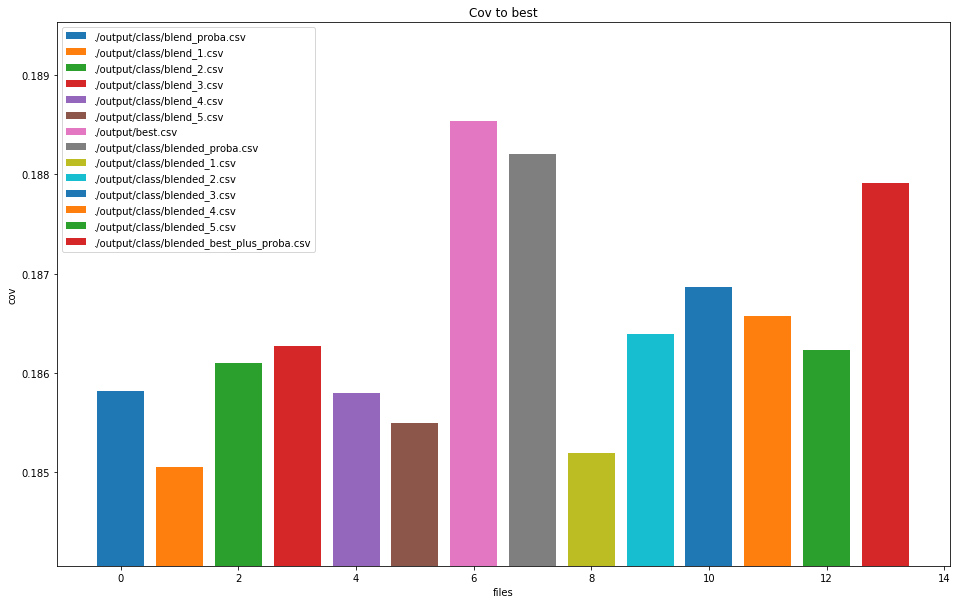

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)


# Plot
for i in range(len(preds)):
    ax.bar(x=i,height=covs[i],label=paths[i])
    
ax.set_ylim(min(covs)-0.001,max(covs)+0.001)
ax.set(xlabel='files', ylabel='cov',
       title='Cov to best')
ax.legend(loc="upper left", markerscale=2, scatterpoints=1, fontsize=10)
plt.show()